In [1]:
import numpy as np
import porespy as ps
import matplotlib.pyplot as plt
import scipy.io as sio
import skimage as ski
import tqdm
import seaborn as sns
import pandas as pd
from pathlib import Path
import pickle as pkl
from sklearn.neighbors import KernelDensity
from  scipy.stats import gaussian_kde


cwd = Path().resolve()

In [2]:
# Define overall variables used to analyze the data
resolution = 16.81E-6 # adding resolution in meters
lowFlowVelCutoff = 6.5 * 10 ** float(-6) #0.000207 # 5.13 * 10 ** float(-5) # 0.5 * 10 ** float(-5)
poreDiamThresh = 20
poreVolumeCutoff = 38000
simPressure = 0.00005 # This is currently hardcoded!!
imageSize = 512
experimentTime = 90 * 10 ** float(-6) # specify NMR time

filePath = cwd / 'subBeadPackPy512_justSpheres.npy'
primaryImage = np.load(filePath)

filePath = cwd / 'finalSimFile3D512.npy'
secondaryImage = np.load(filePath)
primaryImage[primaryImage == 255] = 1

# ps.io.to_vtk(secondaryImage,'simulatedMedium')


primaryImage = np.transpose(primaryImage)
secondaryImage = np.transpose(secondaryImage)

filePath = cwd / 'primarySnowOut.npy'
primarySnow = np.load(filePath)
filePath = cwd / 'primaryPoreInfo.p'
#primaryInfo = np.load(filePath,allow_pickle=True)
poreInfoPrimary = pkl.load(open(filePath,'rb'))

filePath = cwd / 'secondarySnowOut.npy'
secondarySnow = np.load(filePath)
filePath = cwd / 'secondaryPoreInfo.p'
#secondaryInfo = np.load(filePath,allow_pickle=True)
poreInfoSecondary = pkl.load(open(filePath,"rb"))


In [3]:
filePath = cwd / 'velocityFiles' / 'velocityNormCodeSecondary_0.00005.mat'
velSecondaryMat = sio.loadmat(filePath)
velDataNormSecondary = velSecondaryMat['velNorm']

filePath = cwd / 'velocityFiles' / 'velocityNormCodePrimary_0.00005.mat'
velPrimaryMat = sio.loadmat(filePath)
velDataNormPrimary = velPrimaryMat['velNorm']


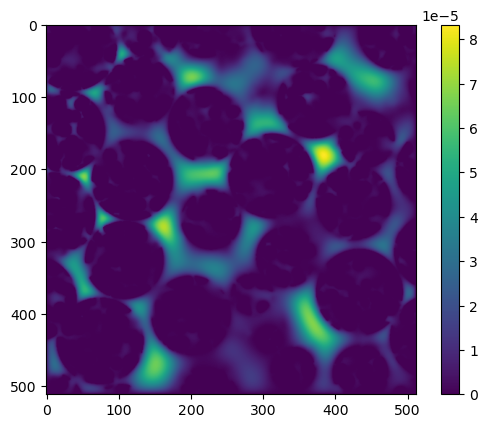

In [4]:
slice = 35

plt.style.use('default')

fig = plt.figure()
plot = plt.imshow(velDataNormSecondary[:,:,slice]) 

fig.colorbar(plot)
plt.savefig('simulatedVelocity.svg', dpi=300, facecolor='w', edgecolor='w')




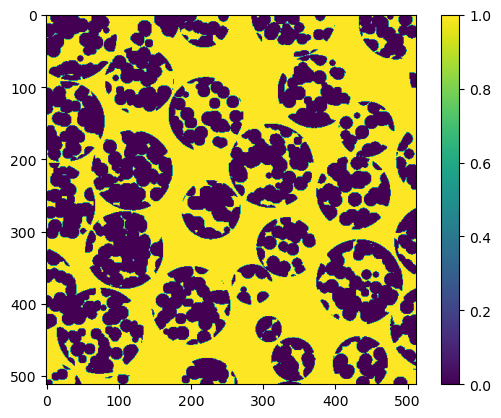

In [9]:
fig = plt.figure()
plot2 = plt.imshow(secondaryImage[:,:,slice])
fig.colorbar(plot2)
plt.savefig('intraPoreSpace.png', dpi=300, facecolor='w', edgecolor='w')


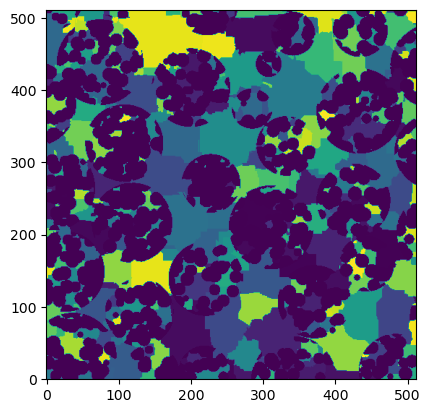

In [10]:
plt.imshow(ps.tools.randomize_colors(secondarySnow[:,:,slice]), origin='lower')
plt.savefig('secondaryRegions2.png', dpi=300, facecolor='w', edgecolor='w')


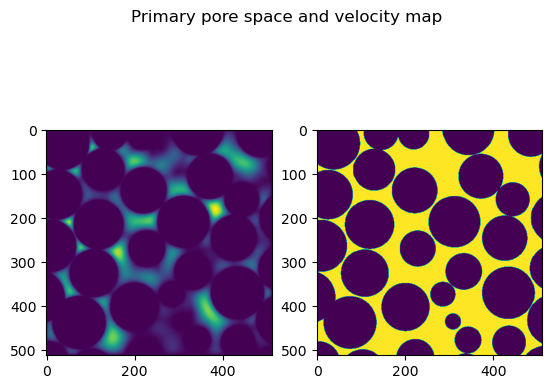

In [8]:
slice = 35

fig, (p1, p2) = plt.subplots(1, 2)

fig.suptitle('Primary pore space and velocity map')
p1.imshow(velDataNormPrimary[:,:,slice])
p2.imshow(primaryImage[:,:,slice])

fig.savefig('primaryPoreImage.png', dpi=300, facecolor='w', edgecolor='w')

### Load all the data

In [9]:
intraPoreMeanPoreVelocity = np.load('intraPore_meanVel.npy')
intraPore_metric_PoreVelocity = np.load('intraPore_metricVel.npy')
intraPoreVolumeVector = np.load('intraPoreVolumeVector.npy')
intraPoreVelocityDataframe = np.load('intraPoreVelocityDataframe.npy')
intraPoreVolumeDataframe = np.load('intraPoreVolumeDataframe.npy')

maskedSecondaryMeanPoreVelocity = np.load('maskedPore_meanVel.npy')
maskedSecondary_metric_PoreVelocity = np.load('maskedPore_metricVel.npy')
maskedSecondaryPoreVolumeVector = np.load('maskedPoreVolumeVector.npy')
maskedSecondaryPoreVolumeDataframe = np.load('maskedPoreVolumeDataframe.npy')
maskedSecondaryPoreVelocityDataframe = np.load('maskedPoreVelocityDataframe.npy')

# Seogi: only part changed.
#df_secondaryVelocity = pd.read_csv('secondaryVelocities.csv')
df_secondaryVelocity = pd.read_pickle('secondaryVelocities.pkl')

## Format Dataframe


In [10]:
copyInterGrainPoreVol = np.array(df_secondaryVelocity["Intergrain Pore Volume"])
filtInterGrainVel = np.zeros(copyInterGrainPoreVol.shape)
for a in range(len(copyInterGrainPoreVol)):
    if np.isnan(copyInterGrainPoreVol[a]):
        filtInterGrainVel[a] = 0
    else:
        filtInterGrainVel[a] = copyInterGrainPoreVol[a]

In [11]:
df_secondaryVelocity["Intragrain Pore Volume"] = df_secondaryVelocity["Intragrain Pore Volume"] - filtInterGrainVel

In [12]:
df_secondaryVelocity

,All secondary regions,All secondary pore volumes,Median secondary pore velocity,Intragrain Pore Volume,Intragrain Median Velocity,Intergrain Pore Volume,Intergrain Median Velocity
0,0,0.0,0.000000e+00,NaN,NaN,NaN,NaN
1,1,1391.0,1.883050e-08,1391,1.88305e-08,NaN,NaN
2,2,5440.0,7.619900e-07,5440,7.6199e-07,NaN,NaN
3,3,52403.0,3.808600e-06,0,1.1715e-07,52403,4.3474e-06
4,4,214270.0,5.869350e-06,0,5.5721e-07,214270,6.947e-06
...,...,...,...,...,...,...,...
6388,6388,111.0,1.260050e-07,0,1.0832e-07,111,1.97475e-07
6389,6389,211.0,NaN,NaN,NaN,NaN,NaN
6390,6390,422.0,NaN,NaN,NaN,NaN,NaN
6391,6391,192.0,NaN,NaN,NaN,NaN,NaN


## Plot Pore Volume

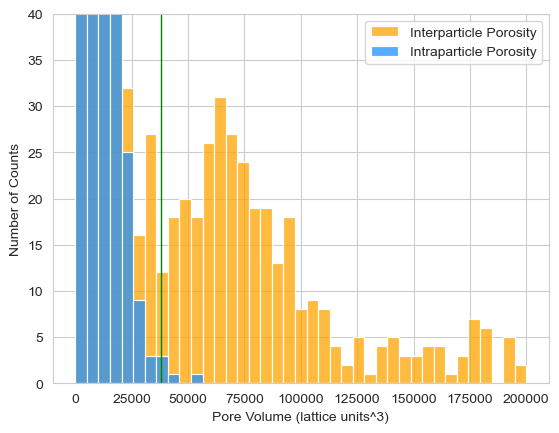

In [14]:
volumeBins = np.linspace(0, 200000, num=40)

fig, ax = plt.subplots()
sns.set_style('whitegrid')


sns.histplot(data=df_secondaryVelocity["Intergrain Pore Volume"],
     bins=volumeBins,color="orange", label="Interparticle Porosity")
sns.histplot(data=df_secondaryVelocity["Intragrain Pore Volume"],
    bins=volumeBins,color="dodgerblue", label="Intraparticle Porosity")


#sns.displot(data=[df_secondaryVelocity["Intragrain Pore Volume"], df_secondaryVelocity["Intergrain Pore Volume"]],
#            bins=volumeBins)
plt.ylim([0,40])
plt.legend()
plt.ylabel('Number of Counts')
plt.xlabel('Pore Volume (lattice units^3)')

plt.plot([poreVolumeCutoff, poreVolumeCutoff],[0,200],'g',lw=1)

figStr = 'interAndIntraPoreVolume_pressure_'+str(simPressure)+'.png'

plt.savefig(figStr, dpi=300, facecolor='w', edgecolor='w')


## Plot inter and intragranular porosity


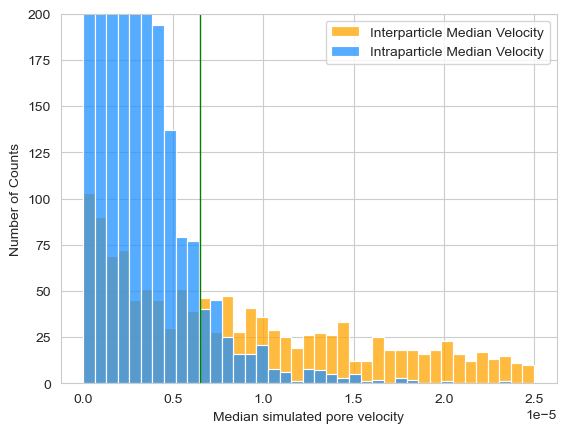

In [18]:
bins = np.linspace(0.000002, 0.00005, num=20)
#np.append(bins,0.0001)
bins = np.append(bins, 1000)
bins = np.insert(bins, 0, 0)
bins = np.insert(bins, 1, 0.00000001)
bins = np.insert(bins, 2, 0.0000001)
bins = np.insert(bins, 3, 0.000001)


binnedIntraVel = pd.cut(df_secondaryVelocity["Intragrain Median Velocity"], bins=bins, right=False)
binnedInterVel = pd.cut(df_secondaryVelocity["Intergrain Median Velocity"], bins=bins, right=False)
df_secondaryVelocity["binned_intraVelocity"] = binnedIntraVel
df_secondaryVelocity["binned_interVelocity"] = binnedIntraVel

yMax = 3000
velBins = np.linspace(0, 0.000025, num=40)

fig, ax = plt.subplots()
#fig.suptitle('Intra and inter pore velocities', fontsize=20)

sns.histplot(data=df_secondaryVelocity["Intergrain Median Velocity"], bins=velBins,
             ax=ax, color="orange", label="Interparticle Median Velocity")
sns.histplot(data=df_secondaryVelocity["Intragrain Median Velocity"],bins=velBins,
             ax=ax,color="dodgerblue", label="Intraparticle Median Velocity")

plt.legend()
ax.set_ylim([0,200])
ax.set_ylabel('Number of Counts')
ax.set_xlabel('Median simulated pore velocity')


lowFlowVelCutoff = 6.5 * 10 ** float(-6) #0.000207 # 5.13 * 10 ** float(-5) # 0.5 * 10 ** float(-5)
ax.plot([lowFlowVelCutoff , lowFlowVelCutoff],[0,200],'g',lw=1)

figStr = 'interAndIntraPoreVelocity_pressure_'+str(simPressure)+'.png'

fig.savefig(figStr, dpi=300, facecolor='w', edgecolor='w')



## Plot both pore volume and median velocity

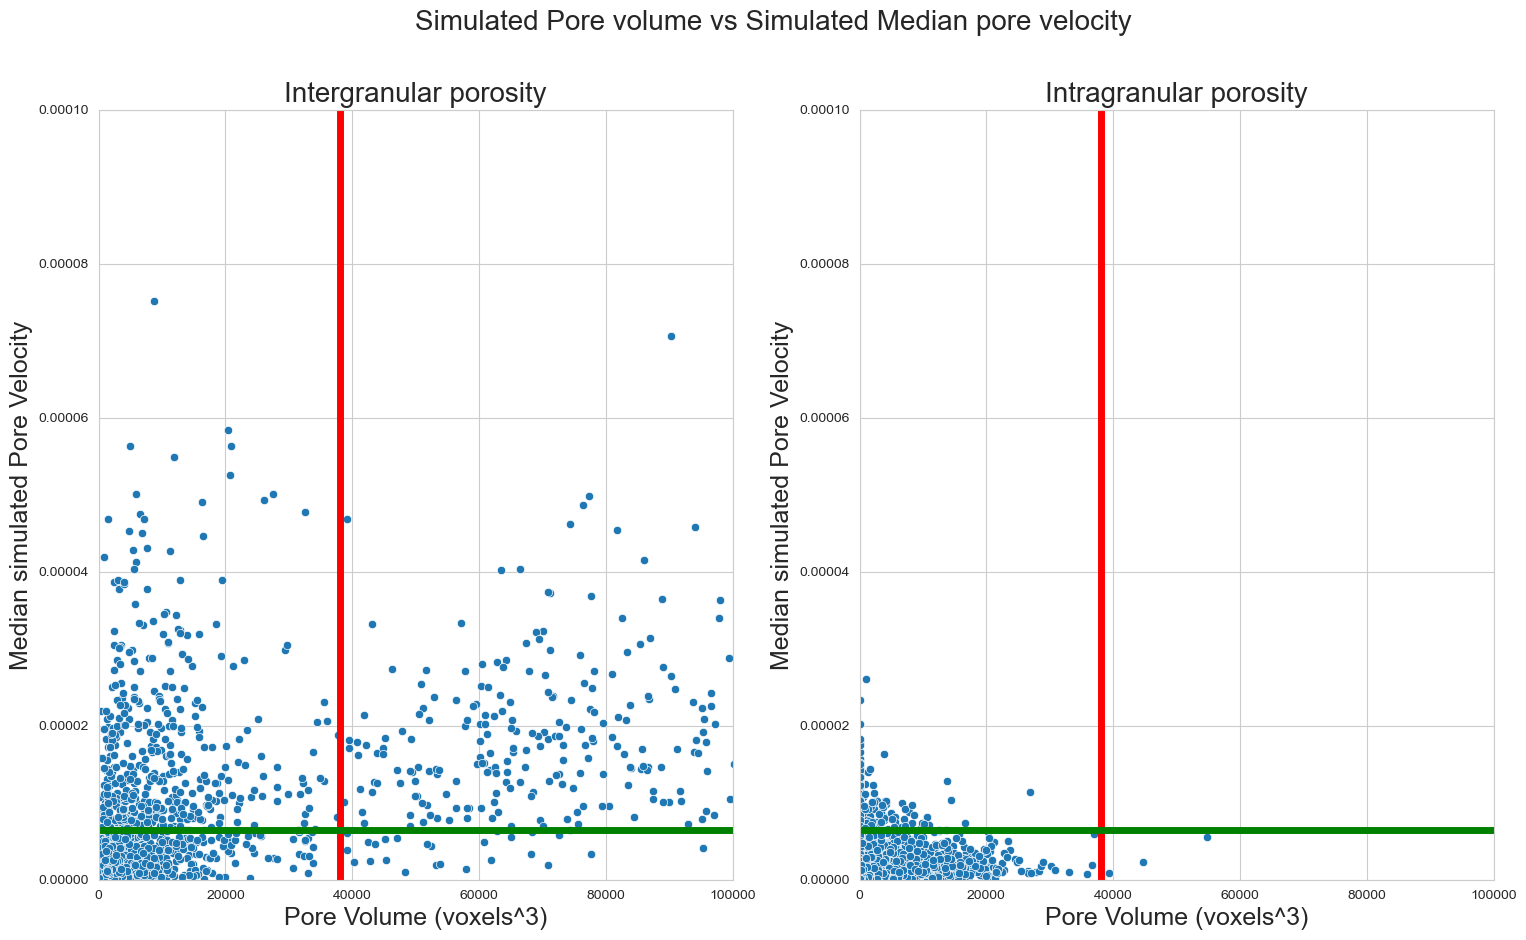

In [41]:
#######################################

yMax = 0.0001
xMax = 100000#np.max(df_secondaryVelocity["Intergrain Pore Volume"])
# Extra title for Pore Pressure ='+str(simPressure)

fig, axes = plt.subplots(1, 2, figsize=(18, 10))
fig.suptitle('Simulated Pore volume vs Simulated Median pore velocity', fontsize=20)
sns.scatterplot(data=df_secondaryVelocity,x="Intergrain Pore Volume", y='Intergrain Median Velocity',ax=axes[0])
axes[0].set_xlabel('Pore Volume (voxels^3)', fontsize=18)
axes[0].set_ylabel('Median simulated Pore Velocity', fontsize=18)
axes[0].set_title('Intergranular porosity', fontsize=20)
axes[0].set_ylim([0,yMax])
axes[0].set_xlim([0,xMax])
axes[0].plot([poreVolumeCutoff, poreVolumeCutoff],[0,yMax],'r',lw=5)
axes[0].plot([0,xMax],[lowFlowVelCutoff, lowFlowVelCutoff],'g',lw=5)

sns.scatterplot(data=df_secondaryVelocity, x="Intragrain Pore Volume", y='Intragrain Median Velocity',ax=axes[1])
axes[1].set_xlabel('Pore Volume (voxels^3)', fontsize=18)
axes[1].set_ylabel('Median simulated Pore Velocity', fontsize=18)
axes[1].set_title('Intragranular porosity', fontsize=20)
axes[1].set_ylim([0,yMax])
axes[1].set_xlim([0,xMax])
axes[1].plot([poreVolumeCutoff, poreVolumeCutoff],[0,yMax],'r',lw=5)
axes[1].plot([0,xMax],[lowFlowVelCutoff, lowFlowVelCutoff],'g',lw=5)

figStr = 'poreVolumeVsPoreVelocity_zoomIn'+'.png'

fig.savefig(figStr, dpi=300, facecolor='w', edgecolor='w')


In [ ]:
df_secondaryVelocity.count()

# IN PROGRESS RESEARCH BELOW

## Add diffusion broadening to simulation data

In [35]:
D_0 = 2.023 * 10 ** float(-9) # for water at twenty degrees Celsius
T = 90 * 10 ** float(-6) # 90 ms, same as NMR experiment
diffusionLength = np.sqrt(6*D_0 * T) # Einstein equation for self diffusion

diffusionDist = np.random.normal(0,diffusionLength,6000)


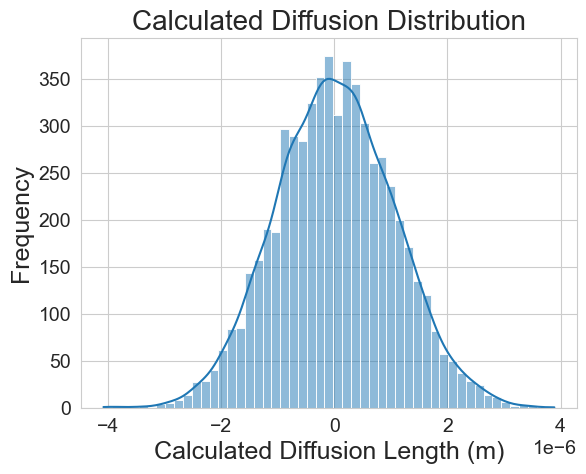

In [58]:
fig, ax = plt.subplots()

sns.histplot(diffusionDist,kde=True,ax=ax)
ax.set_xlabel('Calculated Diffusion Length (m)', fontsize=18)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_title('Calculated Diffusion Distribution', fontsize=20)

figStr = 'diffDist'+'.png'

fig.savefig(figStr, dpi=300, facecolor='w', edgecolor='w')

In [38]:
secondaryMedianVel = df_secondaryVelocity["Median secondary pore velocity"]
secondaryMedianVel = np.array(secondaryMedianVel)

### Plot all pore velocities

In [85]:
# filter by pore space
allVelocities = velDataNormSecondary[secondaryImage == True]
# smush into one dimension
allVelocities = np.squeeze(allVelocities)

In [88]:
allDisplacement = allVelocities # * resolution * experimentTime # this is now in units of length

In [46]:
bins = np.linspace(0.000002, 0.00005, num=20)
#np.append(bins,0.0001)
bins = np.append(bins, 1000)
bins = np.insert(bins, 0, 0.000000001)
bins = np.insert(bins, 1, 0.00000001)
bins = np.insert(bins, 2, 0.0000001)
bins = np.insert(bins, 3, 0.000001)

binnedAllDisplacements = pd.cut(allDisplacement, bins=bins, right=False)

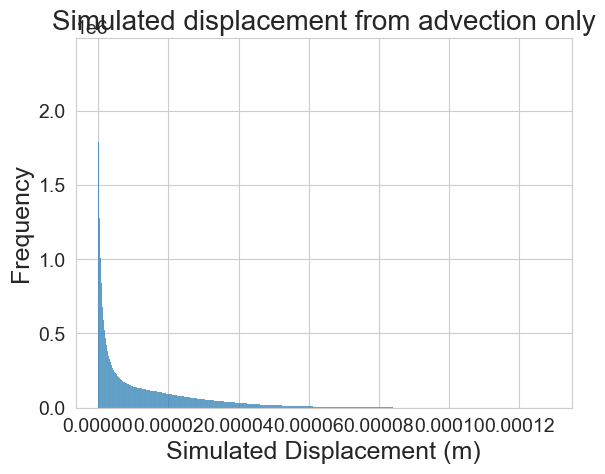

In [89]:
fig, ax = plt.subplots()

sns.histplot(allDisplacement) # This is in units of length
ax.set_xlabel('Simulated Displacement', fontsize=18)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_title('Simulated displacement from advection only', fontsize=20)

figStr = 'simulatedDisplacement'+'.png'

fig.savefig(figStr, dpi=300, facecolor='w', edgecolor='w')

## Load NMR data

In [83]:
filePath = cwd / 'summedNMRDisp.mat'
NMR_dispData = sio.loadmat(filePath)
NMRDisp = NMR_dispData['summedDispData']
NMRDisp = np.transpose(NMRDisp)
NMRDisp = np.squeeze(NMRDisp)

filePath = cwd / 'calculatedNMRDispVector.mat'
NMR_dispVector = sio.loadmat(filePath)
NMRDispVector = NMR_dispVector['newDispVector']
NMRDispVector = np.transpose(NMRDispVector)
NMRDispVector = np.squeeze(NMRDispVector)

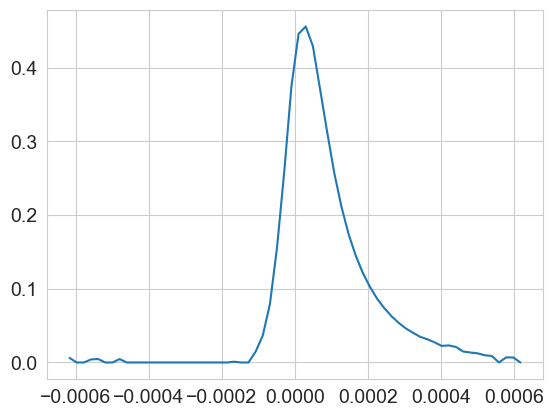

In [84]:
fig, ax = plt.subplots()
plt.plot(NMRDispVector,NMRDisp)


In [53]:
displacement = np.array([i for i in range(NMRDisp.size)]) * 1e-5
import matplotlib
matplotlib.rcParams['font.size'] = 14

Text(0.00054, -0.1, '-')

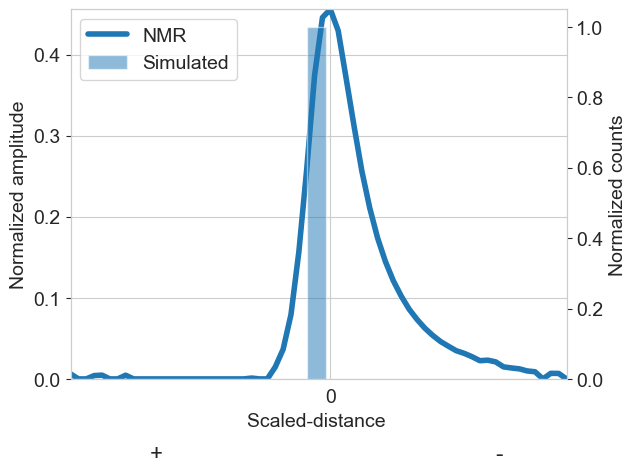

In [65]:
fig, ax = plt.subplots()

# Fix this as per original code in email
tmp = np.r_[
    # :: is downsampling, pick 6000 and scale in x
    allDisplacement[::10000][:6000]* 1e4 * 4 + 0.00032,
]

tmp_nmr = NMRDisp - NMRDisp.min()
ax.plot(displacement, tmp_nmr,axes=ax, label='NMR', lw=4)
ax.set_ylim(tmp_nmr.min(), tmp_nmr.max())
ax_1 = ax.twinx()
# ax_1.hist(allVelocitiesNorm[::10]*6 + 32, density=True, bins=20, alpha=0.5)
dummy = ax.hist(np.ones(5), alpha=0.5, label="Simulated", color='#1f77b4')
out = ax_1.hist(tmp, density=False, bins=np.linspace(0, 0.0006, 25), alpha=0.5)
# ax_1.hist(diffusionDistScale * 1e-3 + 0.0003, density=True, bins=np.linspace(0, 0.0006, 25), alpha=0.5)
ax_1.grid(False)
ax.set_xlabel("Scaled-distance ")
ax.set_ylabel("Normalized amplitude")
ax_1.set_ylabel("Normalized counts")
ax.legend(loc=2)
ax.set_xlim(displacement.min(), displacement.max())

ytikcs_sim = np.linspace(0, out[0].max(), 6)
ax_1.set_yticks(ytikcs_sim)
ax_1.set_yticklabels(["{:.1f}".format(x) for x in (np.arange(6)*0.2)])
xticks = ax.get_xticks()

ind_max = np.argmax(tmp_nmr)
zero_point = displacement[ind_max]
ax.set_xticks([zero_point])
ax.set_xticklabels(['0'])
ax.text(displacement[10], -0.1, '+', fontsize=16)
ax.text(displacement[-10], -0.1, '-', fontsize=16)
# figStr = 'NMRDispHist'+'.png'
# fig.savefig(figStr, dpi=300, facecolor='w', edgecolor='w')

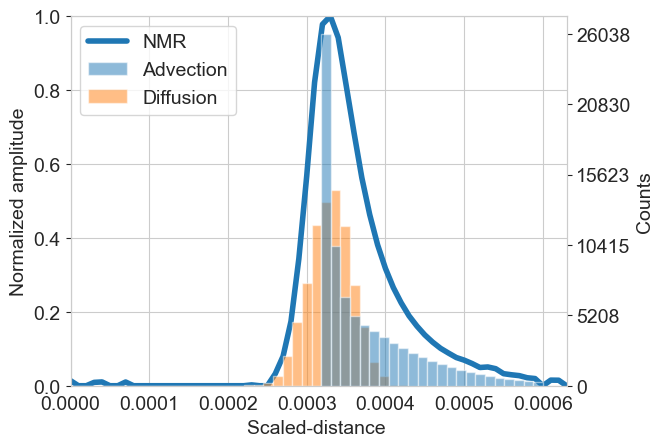

In [66]:
fig, ax = plt.subplots()
tmp_nmr = NMRDispScale - NMRDispScale.min()

# Fix to shift to zero
ax.plot(displacement, tmp_nmr,axes=ax, label='NMR', lw=4)

dummy = ax.hist(np.ones(5), alpha=0.5, label="Advection", color='#1f77b4')
dummy = ax.hist(np.ones(5), alpha=0.5, label="Diffusion", color='#ff7f0e')
ax.set_xlim(displacement.min(), displacement.max())
ax.set_ylim(tmp_nmr.min(), tmp_nmr.max())
ax_1 = ax.twinx()
# ax_1.hist(allVelocitiesNorm[::10]*6 + 32, density=True, bins=20, alpha=0.5)
out1 = ax_1.hist(allDisplacementNorm[::10] * 1e4 * 4 + 0.00032, density=True, bins=np.linspace(0, 0.0006, 50), alpha=0.5, label="Advection", zorder=3)
out2 = ax_1.hist(diffusionDistScale * 2e-4 + 0.00033, density=True, bins=np.linspace(0, 0.0006, 50), alpha=0.5, label="Diffusion", zorder=2)
ax_1.grid(False)
ax.legend(loc=2)
ytikcs_sim = np.linspace(0, np.r_[out1[0], out2[0]].max(), 6)
ax_1.set_yticks(ytikcs_sim)
# ax_1.set_yticklabels(["{:.1f}".format(x) for x in (np.arange(6)*0.2)])
xticks = ax.get_xticks()
ax.set_xlabel("Scaled-distance ")
ax.set_ylabel("Normalized amplitude")
ax_1.set_ylabel("Counts")

ind_max = np.argmax(tmp_nmr)
zero_point = displacement[ind_max]
#ax.set_xticks([zero_point])
#ax.set_xticklabels(['0'])
#ax.text(displacement[10], -0.1, '+', fontsize=16)
#ax.text(displacement[-10], -0.1, '-', fontsize=16)
figStr = 'NMRDispHistSep'+'.png'
fig.savefig(figStr, dpi=300, facecolor='w', edgecolor='w')

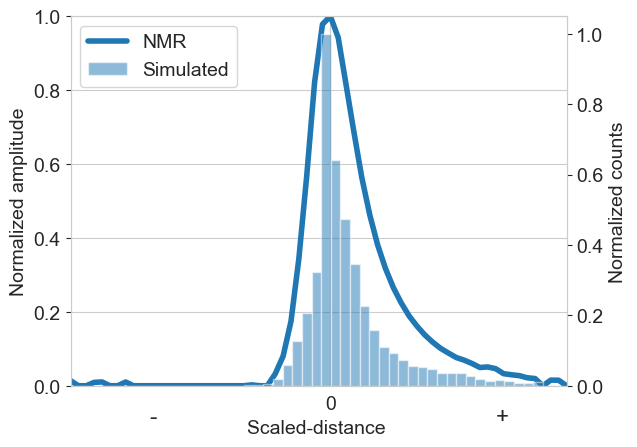

In [70]:
fig, ax = plt.subplots()

tmp = np.r_[
    allDisplacementNorm[::10000][:6000]* 1e4 * 4 + 0.00032, 
    diffusionDistScale[:12000] * 2e-4 + 0.00033
]

tmp_nmr = NMRDispScale - NMRDispScale.min()
ax.plot(displacement, tmp_nmr,axes=ax, label='NMR', lw=4)
ax.set_ylim(tmp_nmr.min(), tmp_nmr.max())
ax_1 = ax.twinx()
# ax_1.hist(allVelocitiesNorm[::10]*6 + 32, density=True, bins=20, alpha=0.5)
dummy = ax.hist(np.ones(5), alpha=0.5, label="Simulated", color='#1f77b4')
out = ax_1.hist(tmp, density=False, bins=np.linspace(0, 0.0006, 50), alpha=0.5)
# ax_1.hist(diffusionDistScale * 1e-3 + 0.0003, density=True, bins=np.linspace(0, 0.0006, 25), alpha=0.5)
ax_1.grid(False)
ax.set_xlabel("Scaled-distance ")
ax.set_ylabel("Normalized amplitude")
ax_1.set_ylabel("Normalized counts")
ax.legend(loc=2)
ax.set_xlim(displacement.min(), displacement.max())

ytikcs_sim = np.linspace(0, out[0].max(), 6)
ax_1.set_yticks(ytikcs_sim)
ax_1.set_yticklabels(["{:.1f}".format(x) for x in (np.arange(6)*0.2)])
xticks = ax.get_xticks()

ind_max = np.argmax(tmp_nmr)
zero_point = displacement[ind_max]
ax.set_xticks([zero_point])
ax.set_xticklabels(['0'])
ax.text(displacement[10], -0.1, '-', fontsize=16)
ax.text(displacement[-10], -0.1, '+', fontsize=16)

figStr = 'NMRDispHist+SimDist'+'.png'
fig.savefig(figStr, dpi=300, facecolor='w', edgecolor='w')

# Calculate flowing fraction for this data

In [261]:
intergrainPoreCount = df_secondaryVelocity["Intergrain Pore Volume"].count()
print('Number of inter particle pores is',str(intergrainPoreCount))

# Final porosity calculation
porosityCalc = ps.metrics.porosity(secondaryImage)
print('Total porosity:')
print(np.round(porosityCalc,2))

# Get grains
flippedImage = np.copy(secondaryImage)
flippedImage[secondaryImage == 1] = 0
flippedImage[secondaryImage == 0] = 1

Number of inter particle pores is 1423
Total porosity:
0.55


### Refer to other code for less/more mobile calculation
## lowFlowCompute.py
